<a href="https://colab.research.google.com/github/Rijinputhiyonnan/ICT-daily-task-Rijin/blob/main/House_Pricing_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [6]:
df=pd.read_csv('/content/House_Pricing.csv')
df.head(4)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [8]:
df.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [10]:
df.drop(columns=['ID', 'Date House was Sold'], inplace=True)



In [11]:
df.shape

(21613, 19)

In [12]:
df.drop(columns=['No of Times Visited'], inplace=True)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sale Price,21609.0,540198.435744,367388.994461,75000.0000,321950.000000,450000.0000,645000.000,7.700000e+06
No of Bedrooms,21613.0,3.370842,0.930062,0.0000,3.000000,3.0000,4.000,3.300000e+01
No of Bathrooms,21609.0,2.114732,0.770138,0.0000,1.750000,2.2500,2.500,8.000000e+00
Flat Area (in Sqft),21604.0,2079.931772,918.487597,290.0000,1429.250000,1910.0000,2550.000,1.354000e+04
Lot Area (in Sqft),21604.0,15107.756897,41428.266183,520.0000,5040.000000,7617.5000,10688.250,1.651359e+06
No of Floors,21613.0,1.494309,0.539989,1.0000,1.000000,1.5000,2.000,3.500000e+00
Overall Grade,21613.0,7.623467,1.105439,1.0000,7.000000,7.0000,8.000,1.000000e+01
Area of the House from Basement (in Sqft),21610.0,1788.344193,827.982604,290.0000,1190.000000,1560.0000,2210.000,9.410000e+03
Basement Area (in Sqft),21613.0,291.509045,442.575043,0.0000,0.000000,0.0000,560.000,4.820000e+03
Age of House (in Years),21613.0,46.994864,29.373411,3.0000,21.000000,43.0000,67.000,1.180000e+02


In [14]:
df["Renovated Year"].nunique()

70

In [15]:
df.drop(columns=['Renovated Year'], inplace=True)


In [22]:
def get_missing_per(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [23]:
get_missing_per(df)

Sale Price : 4 (0.019%)
No of Bathrooms : 4 (0.019%)
Flat Area (in Sqft) : 9 (0.042%)
Lot Area (in Sqft) : 9 (0.042%)
Area of the House from Basement (in Sqft) : 3 (0.014%)
Zipcode : 1 (0.005%)
Latitude : 1 (0.005%)
Longitude : 1 (0.005%)
Living Area after Renovation (in Sqft) : 1 (0.005%)


{'Sale Price': 0.01850737981770231,
 'No of Bathrooms': 0.01850737981770231,
 'Flat Area (in Sqft)': 0.0416416045898302,
 'Lot Area (in Sqft)': 0.0416416045898302,
 'Area of the House from Basement (in Sqft)': 0.013880534863276731,
 'Zipcode': 0.004626844954425577,
 'Latitude': 0.004626844954425577,
 'Longitude': 0.004626844954425577,
 'Living Area after Renovation (in Sqft)': 0.004626844954425577}

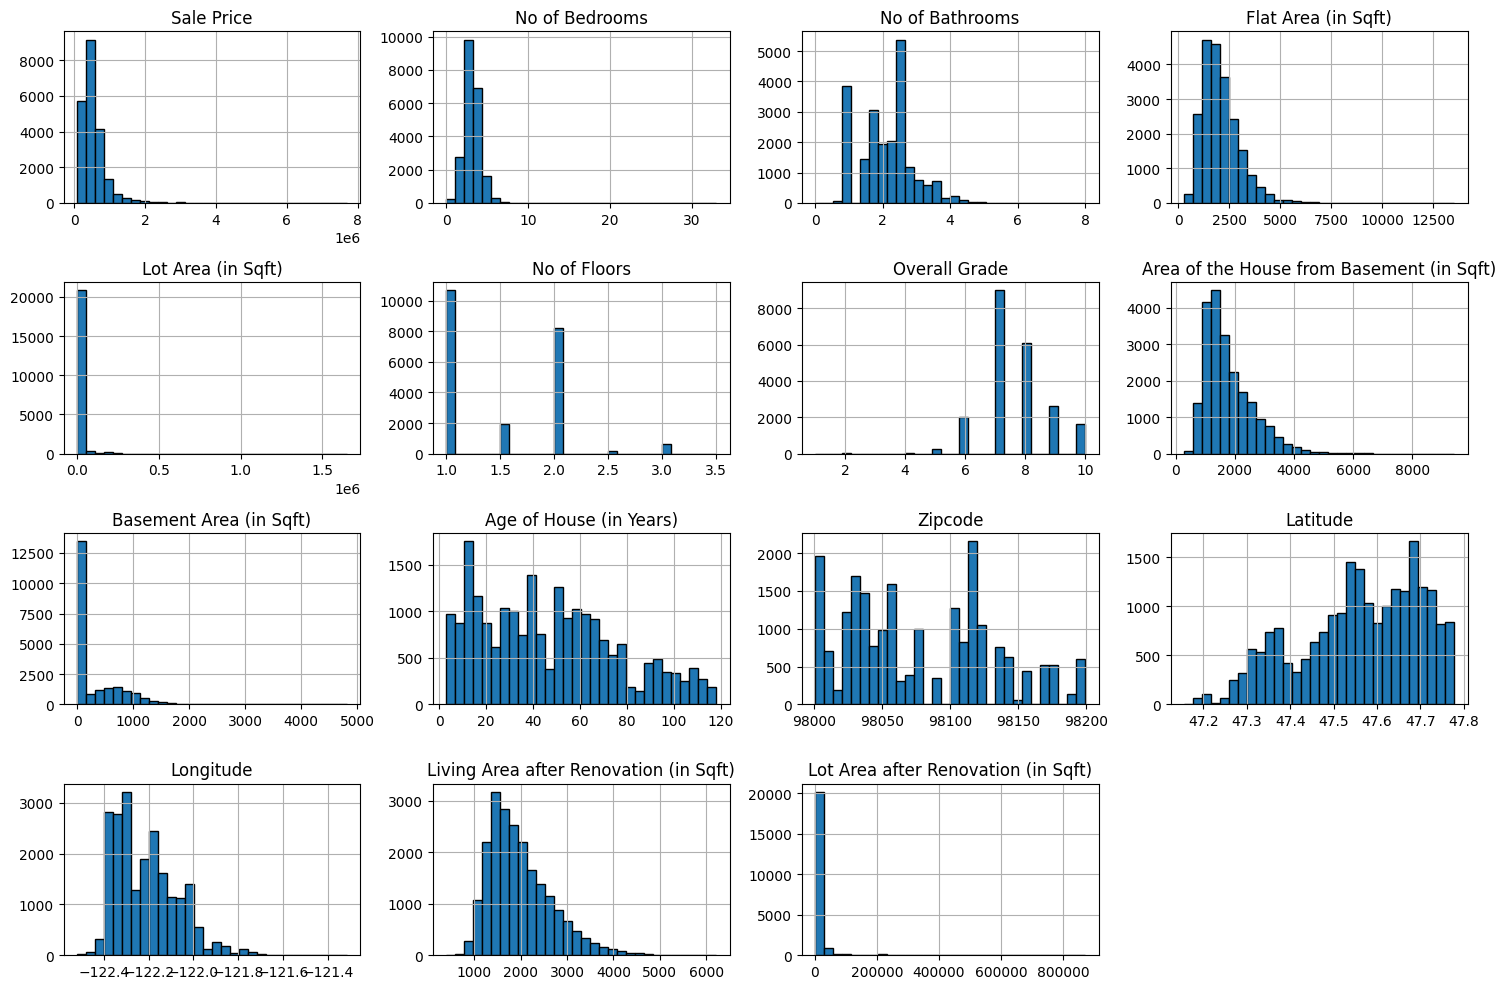

In [ ]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
def null_value_columns(df):
    null_columns = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            null_columns.append(col)
    return null_columns

In [ ]:
print(null_value_columns(df))

['Sale Price', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)']


In [ ]:
def assign_median_to_null_value_columns(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

In [ ]:
assign_median_to_null_value_columns(df)

In [ ]:
df.isnull().sum()

Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [ ]:
df

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,No,Fair,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509
21609,400000.0,4,2.50,2310.0,5813.0,2.0,No,Fair,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200
21610,402101.0,2,0.75,1020.0,1350.0,2.0,No,Fair,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007
21611,400000.0,3,2.50,1600.0,2388.0,2.0,No,Fair,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287


In [ ]:
col_ob_dtype = [col for col in df.columns if df[col].dtype == 'object']
col_ob_dtype

['Waterfront View', 'Condition of the House']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21613 non-null  float64
 1   No of Bedrooms                             21613 non-null  int64  
 2   No of Bathrooms                            21613 non-null  float64
 3   Flat Area (in Sqft)                        21613 non-null  float64
 4   Lot Area (in Sqft)                         21613 non-null  float64
 5   No of Floors                               21613 non-null  float64
 6   Waterfront View                            21613 non-null  object 
 7   Condition of the House                     21613 non-null  object 
 8   Overall Grade                              21613 non-null  int64  
 9   Area of the House from Basement (in Sqft)  21613 non-null  float64
 10  Basement Area (in Sqft

In [25]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
Sale Price,1.000000,0.308463,0.525124,0.702081,0.089616,0.256941,0.580654,0.605495,0.323813,-0.054034,-0.053198,0.306889,0.021507,0.585393,0.082445
No of Bedrooms,0.308463,1.000000,0.515883,0.576616,0.031620,0.175429,0.349008,0.477592,0.303093,-0.154178,-0.152656,-0.008879,0.129499,0.391649,0.029244
No of Bathrooms,0.525124,0.515883,1.000000,0.754691,0.087758,0.500601,0.635573,0.685249,0.283774,-0.505957,-0.204044,0.024508,0.223165,0.568606,0.087218
Flat Area (in Sqft),0.702081,0.576616,0.754691,1.000000,0.172809,0.353950,0.705835,0.876587,0.435230,-0.318207,-0.199416,0.052543,0.240152,0.756357,0.183223
Lot Area (in Sqft),0.089616,0.031620,0.087758,0.172809,1.000000,-0.005235,0.102345,0.183512,0.015287,-0.053062,-0.129536,-0.085672,0.229494,0.144548,0.718548
No of Floors,0.256941,0.175429,0.500601,0.353950,-0.005235,1.000000,0.461228,0.523840,-0.245705,-0.489319,-0.059122,0.049648,0.125391,0.279874,-0.011269
Overall Grade,0.580654,0.349008,0.635573,0.705835,0.102345,0.461228,1.000000,0.705183,0.145266,-0.456629,-0.185836,0.111301,0.201745,0.681338,0.107581
Area of the House from Basement (in Sqft),0.605495,0.477592,0.685249,0.876587,0.183512,0.523840,0.705183,1.000000,-0.051821,-0.423822,-0.261130,-0.000866,0.343776,0.731998,0.194100
Basement Area (in Sqft),0.323813,0.303093,0.283774,0.435230,0.015287,-0.245705,0.145266,-0.051821,1.000000,0.133124,0.074854,0.110554,-0.144728,0.200371,0.017276
Age of House (in Years),-0.054034,-0.154178,-0.505957,-0.318207,-0.053062,-0.489319,-0.456629,-0.423822,0.133124,1.000000,0.346829,0.148066,-0.409336,-0.326217,-0.070958


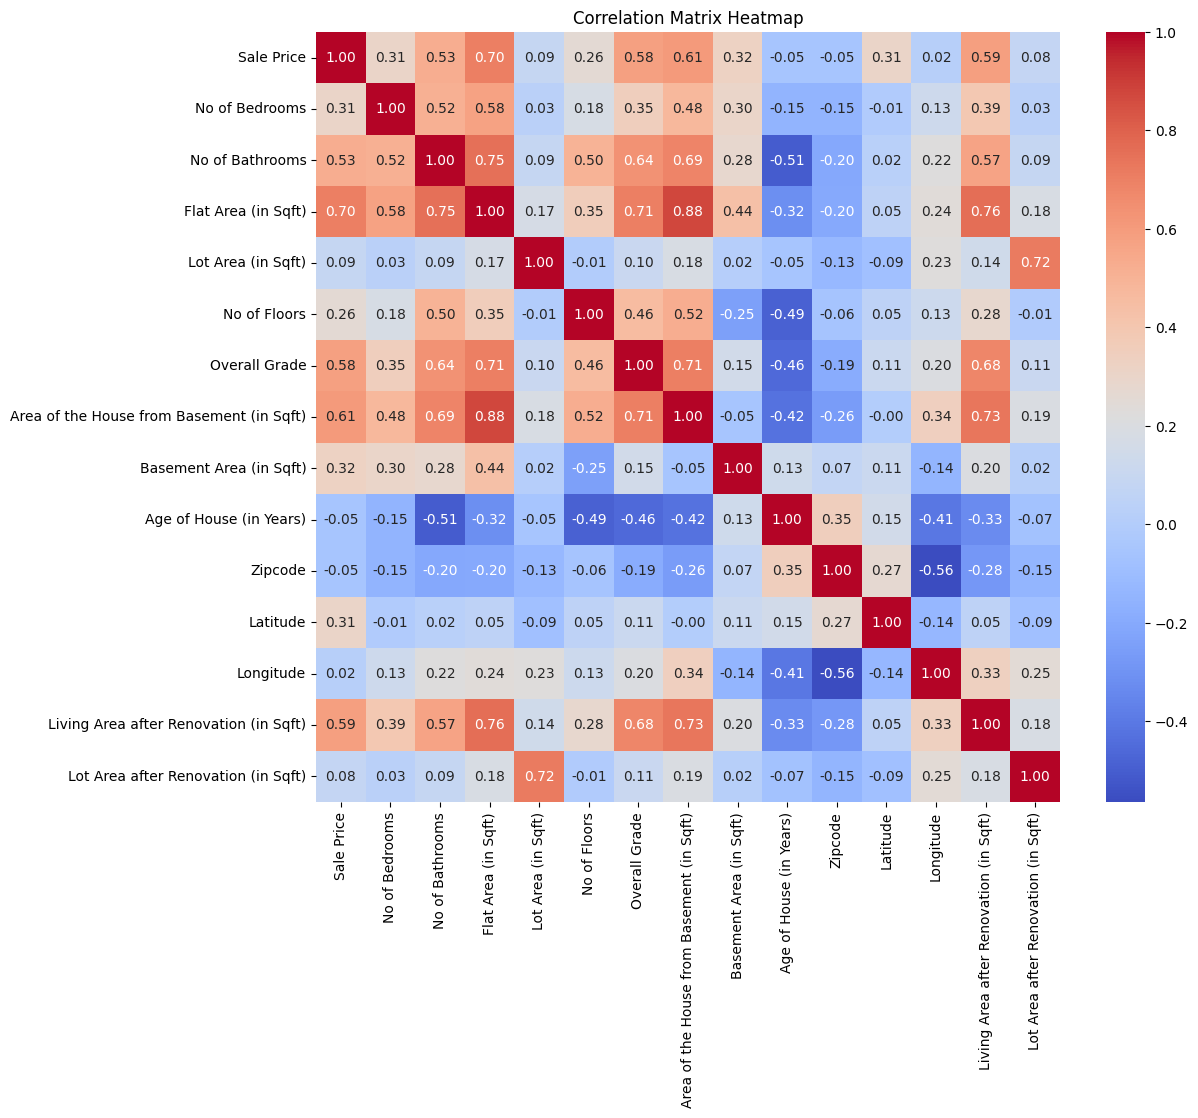

In [26]:
import matplotlib.pyplot as plt

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [31]:
outlier_columns = []
for i in ['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)']:
  # Calculate quartiles
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier boundaries
  lc = Q1 - 1.5 * IQR
  uc = Q3 + 1.5 * IQR

  # Count outliers
  outliers = df[(df[i] < lc) | (df[i] > uc)]
  if outliers.shape[0] > 0:
    outlier_columns.append(i)
    print(f"Column '{i}' has {outliers.shape[0]} outliers.")

print("\nColumns with outliers:")
for col in outlier_columns:
    print(col)

Column 'Sale Price' has 1159 outliers.
Column 'No of Bathrooms' has 571 outliers.
Column 'Flat Area (in Sqft)' has 572 outliers.
Column 'Lot Area (in Sqft)' has 2423 outliers.
Column 'Area of the House from Basement (in Sqft)' has 610 outliers.
Column 'Latitude' has 2 outliers.
Column 'Longitude' has 256 outliers.
Column 'Living Area after Renovation (in Sqft)' has 544 outliers.

Columns with outliers:
Sale Price
No of Bathrooms
Flat Area (in Sqft)
Lot Area (in Sqft)
Area of the House from Basement (in Sqft)
Latitude
Longitude
Living Area after Renovation (in Sqft)


In [32]:
outlier = df[(df['Lot Area (in Sqft)']<lc) | (df['Lot Area (in Sqft)']>uc)].index

In [33]:
outlier

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       21596, 21597, 21598, 21599, 21600, 21602, 21603, 21605, 21606, 21609],
      dtype='int64', length=19063)

In [34]:
df.drop(outlier, inplace=True)

In [36]:
df.shape

(2550, 17)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2550 entries, 26 to 21612
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 2549 non-null   float64
 1   No of Bedrooms                             2550 non-null   int64  
 2   No of Bathrooms                            2549 non-null   float64
 3   Flat Area (in Sqft)                        2547 non-null   float64
 4   Lot Area (in Sqft)                         2541 non-null   float64
 5   No of Floors                               2550 non-null   float64
 6   Waterfront View                            2550 non-null   object 
 7   Condition of the House                     2550 non-null   object 
 8   Overall Grade                              2550 non-null   int64  
 9   Area of the House from Basement (in Sqft)  2550 non-null   float64
 10  Basement Area (in Sqft)    

In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories=[['Bad', 'Okay', 'Fair', 'Good', 'Excellent']])
df['Condition of the House'] = ordinal.fit_transform(df[['Condition of the House']])

In [41]:
df.tail()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
21607,475000.0,3,2.50,1310.0,1294.0,2.0,No,2.0,8,1180.0,130,10,98116.0,47.5773,-122.409,1330.0,1265
21608,360000.0,3,2.50,1530.0,1131.0,3.0,No,2.0,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509
21610,402101.0,2,0.75,1020.0,1350.0,2.0,No,2.0,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007
21611,400000.0,3,2.50,1600.0,2388.0,2.0,No,2.0,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287
21612,325000.0,2,0.75,1020.0,1076.0,2.0,No,2.0,7,1020.0,0,10,98144.0,47.5941,-122.299,1020.0,1357
